In [1]:
from class_utils2_runmodels import ddqn_agent 
import numpy as np
import gym 

env = gym.make("LunarLander-v2")

obs_space = env.observation_space
action_space = env.action_space

episode_num = 100

#--------------------ddqn agent parameters-----------------------------
gamma = 0.99
epsilon = 1.0
epsilon_dec = 0.996
epsilon_end = 0.1
buffer_size = 32000
batch_size = 32
learning_rate = 0.001 #by default = 0.001 change by passing in Adam(lr=learning_rate)
#--------------------ddqn agent parameters-----------------------------

total_scores = []
mean_scores = []
agent = ddqn_agent(gamma, epsilon, buffer_size, batch_size, epsilon_dec, epsilon_end)    #takes in gamma episilon and buffer size of memory and batch_size. learning rate(alpha) can be passed

In [2]:
agent.reload_agent()

In [3]:
for episode_count in range(0, episode_num):
    terminal = False
    score = 0
    state, dummy = env.reset()
    action_count = 0
    while not terminal:
        action, action_array = agent.choose_action(state)

        next_state, reward, terminal, dummy2, dummy3 = env.step(action)
        
        score += reward
        state = next_state
    
        if(action_count >= 650):
            break
        action_count += 1
    total_scores.append(score)
    mean = np.mean(total_scores)
    mean_scores.append(mean)
    print("episode: ", episode_count, " score: ", score, " mean score: ", mean)

episode:  0  score:  118.5910480794712  mean score:  118.5910480794712
episode:  1  score:  -164.59553926046925  mean score:  -23.00224559049903
episode:  2  score:  -176.08142478428368  mean score:  -74.02863865509391
episode:  3  score:  -164.08284199060682  mean score:  -96.54218948897214
episode:  4  score:  -218.0960494059492  mean score:  -120.85296147236754
episode:  5  score:  -166.7233421686203  mean score:  -128.498024921743
episode:  6  score:  173.59046508110805  mean score:  -85.34252634990715
episode:  7  score:  -219.31939518753367  mean score:  -102.08963495461046
episode:  8  score:  -253.42948479286352  mean score:  -118.90517382552747
episode:  9  score:  -22.468737308642574  mean score:  -109.26153017383899
episode:  10  score:  -53.48627352824474  mean score:  -104.19105229696679
episode:  11  score:  -26.450411781437495  mean score:  -97.71266558733934
episode:  12  score:  248.37584645308533  mean score:  -71.09047235346051
episode:  13  score:  -194.997867499396

In [5]:
print(len(mean_scores))
print(len(total_scores))

100
100


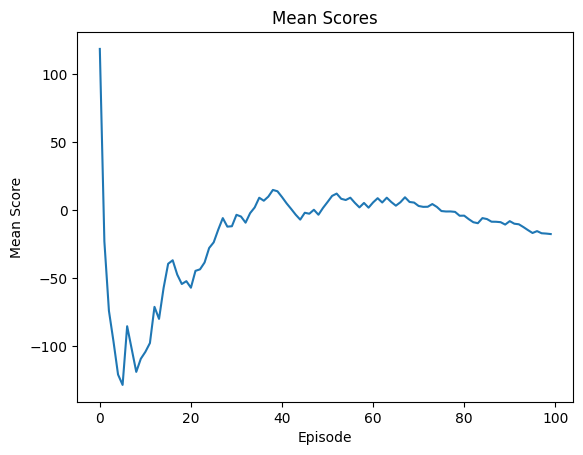

In [7]:
import matplotlib.pyplot as plt

x_axis = list(range(0, 100))
y_axis = mean_scores

plt.plot(x_axis, y_axis)
plt.title('Mean Scores')
plt.xlabel('Episode')
plt.ylabel('Mean Score')
plt.show()

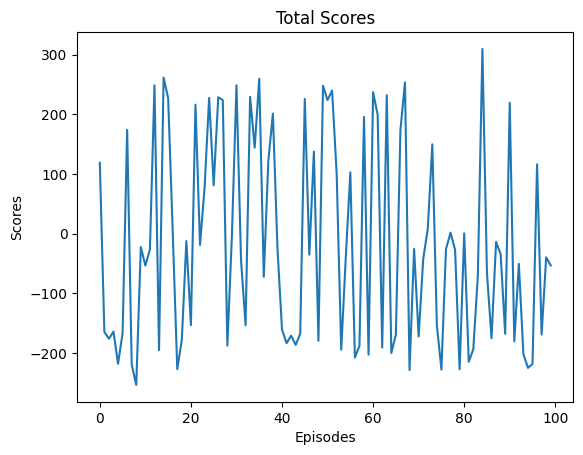

In [8]:
x_axis = list(range(0, 100))
y_axis = total_scores

plt.plot(x_axis, y_axis)
plt.title('Total Scores')
plt.xlabel('Episodes')
plt.ylabel('Scores')
plt.show()

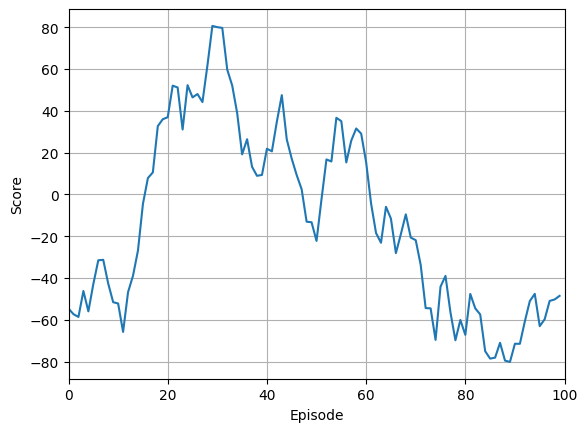

In [11]:
import numpy as np

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

x = list(range(0, 100))
y = total_scores

y_av = movingaverage(y, 20)
plt.plot(x, y_av)
plt.xlim(0,100)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.grid(True)
plt.show()